Dataset Description artist: Name of the Artist.

song: Name of the Track.

popularity: The higher the value the more popular the song is.

danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm

energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on..

loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative

mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

duration in milliseconds :Time of the song

time_signature : a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.

Class: Genre of the track.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
import pickle
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter

### Upload dataset

In [ ]:
train_data = pd.read_csv('train.csv')

In [ ]:
test_data = pd.read_csv('test.csv')

In [ ]:
#split music data into data & labels
from sklearn.model_selection import train_test_split
train_set ,test_set = train_test_split(train_data,test_size = 0.2,random_state = 42)

### Info about the Data

In [ ]:
train_set.shape

(11516, 18)

In [ ]:
train_set.head()

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
6913,6913,My Life As Ali Thomas,Rinn,34.0,0.488,0.780,9.0,-4.971,1,0.0412,0.0162,0.00994,0.0968,0.3550,87.937,207614.000000,4,10
13624,13624,Charlie Haden,The Good Life,36.0,0.616,0.253,7.0,-19.339,1,0.0662,0.0980,0.00005,0.2520,0.4060,110.425,4.706217,4,7
13587,13587,Sonny Terry,Sonny's Whoopin' The Doop,15.0,0.636,0.701,11.0,-12.801,0,0.0577,0.0274,0.46000,0.2990,0.8590,96.449,286693.000000,4,2
8140,8140,FLO,D's,66.0,0.266,0.294,7.0,-11.938,0,0.0291,0.7710,0.69700,0.1070,0.0397,137.941,811077.000000,3,5
11691,11691,Billie Eilish,Therefore I Am,88.0,0.889,0.340,11.0,-7.773,0,0.0697,0.2180,0.13000,0.0550,0.7160,94.009,174321.000000,4,9


### Descriptive Statistics

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11516 entries, 6913 to 7270
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11516 non-null  int64  
 1   Artist Name         11516 non-null  object 
 2   Track Name          11516 non-null  object 
 3   Popularity          11231 non-null  float64
 4   danceability        11516 non-null  float64
 5   energy              11516 non-null  float64
 6   key                 10232 non-null  float64
 7   loudness            11516 non-null  float64
 8   mode                11516 non-null  int64  
 9   speechiness         11516 non-null  float64
 10  acousticness        11516 non-null  float64
 11  instrumentalness    8646 non-null   float64
 12  liveness            11516 non-null  float64
 13  valence             11516 non-null  float64
 14  tempo               11516 non-null  float64
 15  duration_in min/ms  11516 non-null  float64
 16  ti

In [ ]:
train_set['Class'].value_counts()

10    3177
6     1659
9     1599
8     1177
5      930
1      894
2      801
0      420
7      367
4      246
3      246
Name: Class, dtype: int64

### Data Cleaning

#### Checking for Null Values

In [ ]:
#checking for null values
train_set.isnull().sum()

id                       0
Artist Name              0
Track Name               0
Popularity             285
danceability             0
energy                   0
key                   1284
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      2870
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [ ]:
# Dropping rows where name is null
train_set.dropna(subset=['Artist Name'], axis=0, inplace=True) 

### fill null columns

In [ ]:
train_set['Popularity'] = train_set['Popularity'].fillna(train_set['Popularity'].mean())

In [ ]:
train_set['key'] = train_set['key'].fillna(train_set['key'].mean())

In [ ]:
train_set['instrumentalness'] = train_set['instrumentalness'].fillna(train_set['instrumentalness'].mean())

In [ ]:
train_set.nunique()

id                    11516
Artist Name            6779
Track Name            10156
Popularity               99
danceability            871
energy                 1107
key                      12
loudness               7026
mode                      2
speechiness            1156
acousticness           3455
instrumentalness       3600
liveness               1340
valence                1213
tempo                  9446
duration_in min/ms     9668
time_signature            4
Class                    11
dtype: int64

## Remoivng Duplicate rows

In [ ]:
dups = train_set.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(train_set.shape)

Number of duplicate rows = 0
(11516, 18)


In [ ]:
cols = train_set.columns.tolist()
to_remove = ['id', 'popularity', 'duration_ms', 'explicit','release_date', 'time_signature', 'key', 'mode']
reqd_cols = list(set(cols).difference(set(to_remove)))

#Dropping Duplicates
train_set.drop_duplicates(subset=reqd_cols, keep=False, ignore_index=True, inplace=True)

In [ ]:
print('Before',train_set.shape)
train_set.drop_duplicates(inplace=True) 
print('After',train_set.shape)

Before (11516, 18)
After (11516, 18)


In [ ]:
train_set.describe()

,id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,11516.000000,11516.000000,11516.000000,11516.000000,11516.000000,11516.000000,11516.000000,11516.000000,11516.000000,11516.000000,11516.000000,11516.000000,11516.000000,1.151600e+04,11516.000000,11516.000000
mean,7209.073116,44.642329,0.544050,0.663294,5.958561,-7.888612,0.639632,0.080082,0.246879,0.177074,0.195645,0.487863,122.754088,2.004315e+05,3.927319,6.683571
std,4154.909725,17.229221,0.166342,0.235628,3.012875,4.069672,0.480128,0.084522,0.309971,0.263481,0.158327,0.240581,29.723876,1.107138e+05,0.353650,3.219175
min,0.000000,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.013600,0.018300,34.132000,5.339167e-01,1.000000,0.000000
25%,3611.500000,33.000000,0.431000,0.510000,4.000000,-9.504250,0.000000,0.034700,0.004300,0.000316,0.097500,0.299000,99.622000,1.672465e+05,4.000000,5.000000
50%,7190.500000,44.000000,0.546000,0.702000,5.958561,-7.003500,1.000000,0.047700,0.081000,0.053100,0.129000,0.481500,120.065500,2.092130e+05,4.000000,8.000000
75%,10820.500000,56.000000,0.660000,0.860000,8.000000,-5.150000,1.000000,0.082800,0.435000,0.177074,0.258000,0.674000,142.031000,2.520468e+05,4.000000,10.000000
max,14393.000000,100.000000,0.989000,0.999000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [ ]:
train_set["Class"].unique()

array([10,  7,  2,  5,  9,  4,  1,  0,  8,  6,  3])

## Data Analysis & Visualization

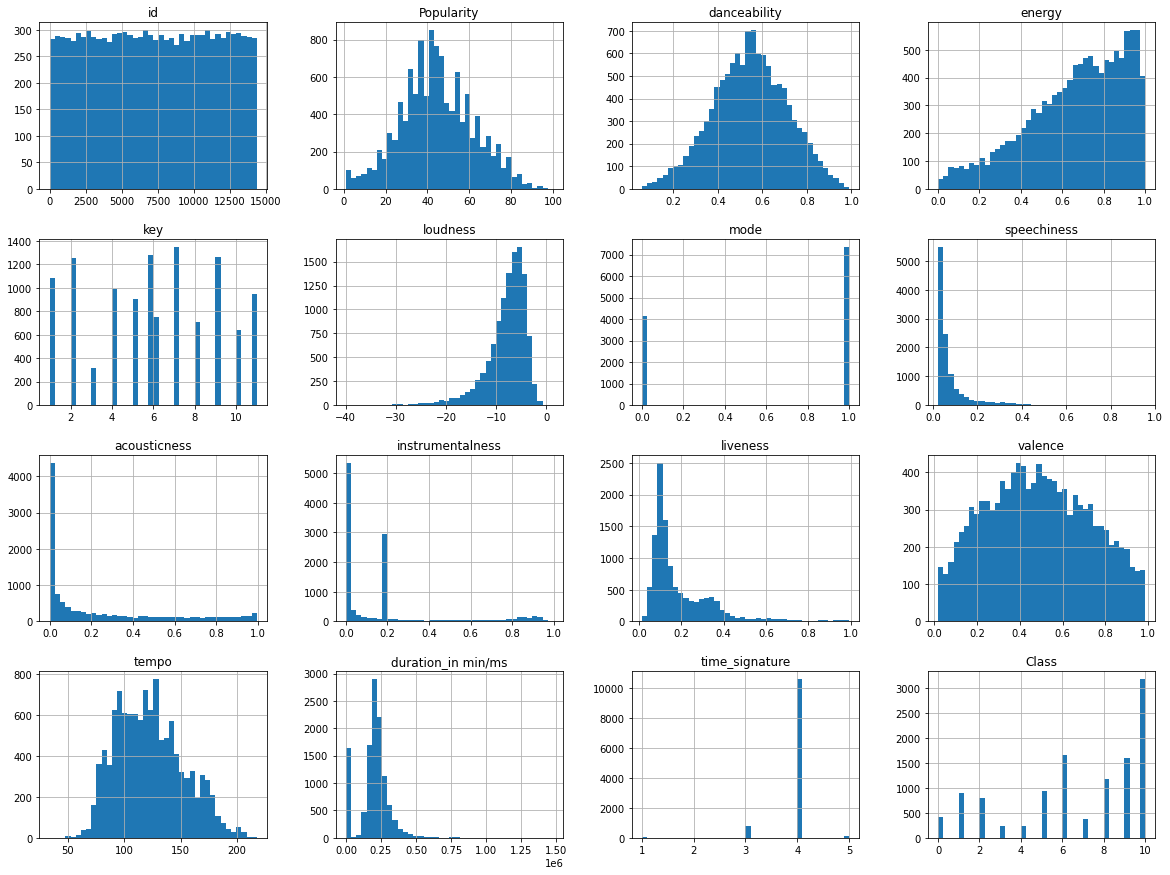

In [ ]:
train_set.hist(bins = 40, figsize = (20,15))
plt.show()

In [ ]:
corr_matrix = train_set.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class                 1.000000
energy                0.223822
duration_in min/ms    0.212684
loudness              0.180602
Popularity            0.159637
time_signature        0.046619
liveness              0.035875
tempo                 0.032459
id                   -0.005465
key                  -0.009655
instrumentalness     -0.019889
mode                 -0.043948
speechiness          -0.054960
valence              -0.075813
danceability         -0.104439
acousticness         -0.245438
Name: Class, dtype: float64

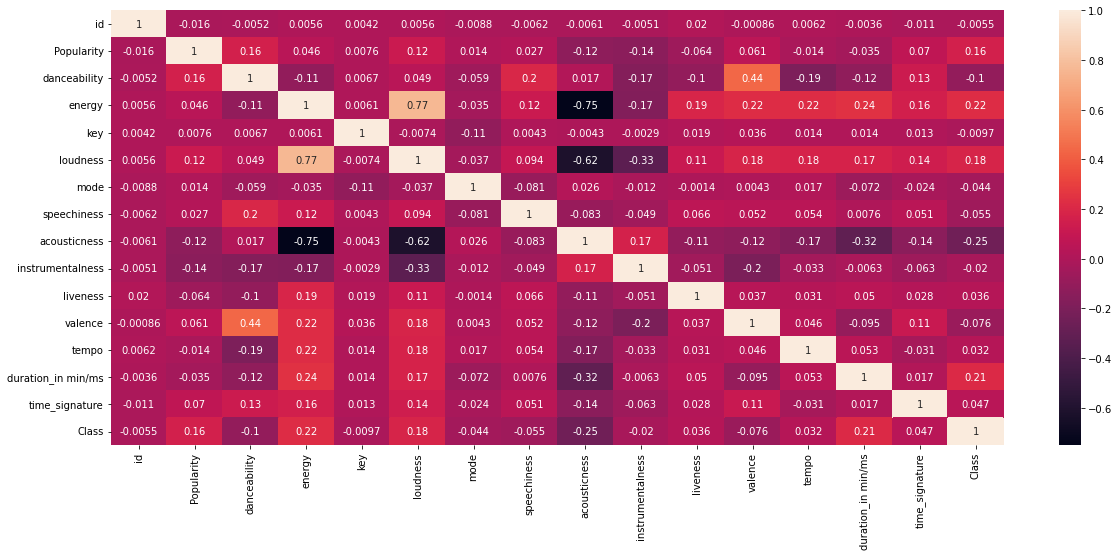

In [ ]:
# Plot the correlation with seaborn
plt.subplots(figsize = (20, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [ ]:
def plot_counts(feature, order = None):
    sns.countplot(x = feature, data = train_set, palette = "ocean", order = order)
    plt.title(f"Counts in each {feature}")
    plt.show()

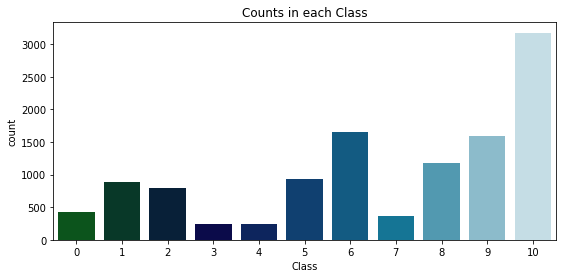

In [ ]:
plt.figure(figsize = (9, 4))
plot_counts("Class")

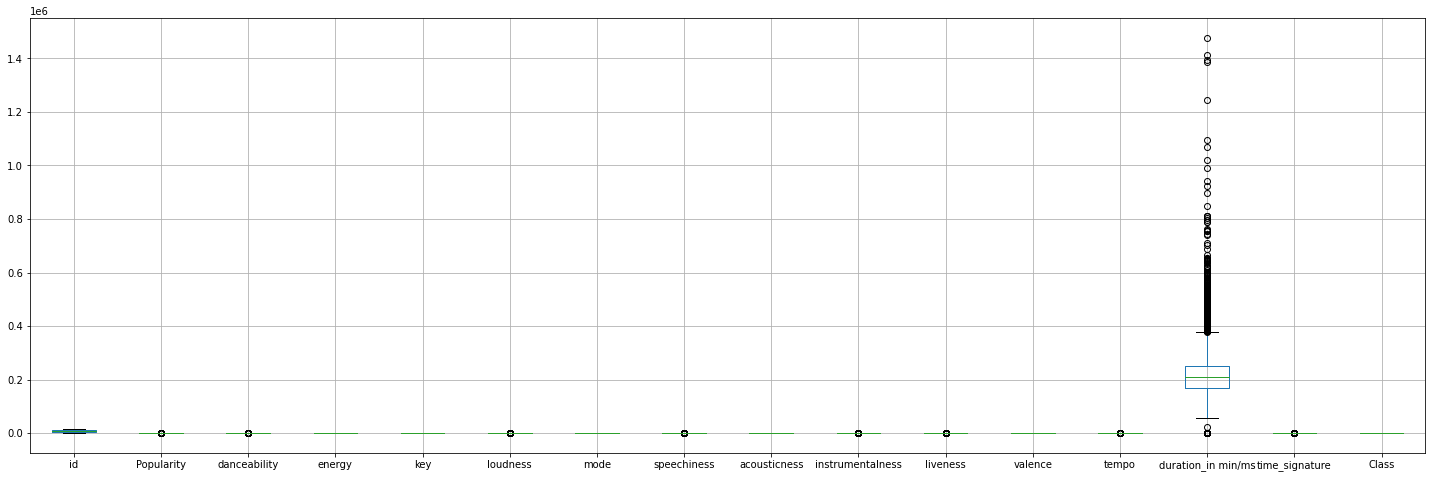

In [ ]:
plt.figure(figsize = (25,8))
train_set.boxplot()

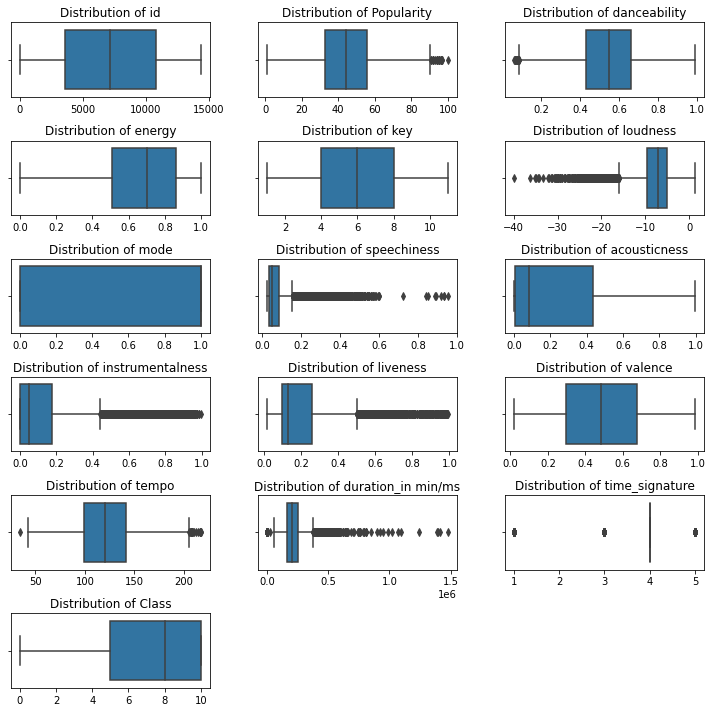

In [ ]:
df_cont = train_set.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(10, 10)) # sets the size of the 4 plot with width as 10 and height as 10
for i,columns in enumerate(df_cont.columns, 1): 
  ax = plt.subplot(6,3,i) # creates 3 subplots in one single row
  sns.boxplot(data = df_cont, x=df_cont[columns]) # creates box plots for each feature in df_cont dataset
  ax.set_xlabel(None) # removes the labels on x-axis
  ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
  plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plot

In [ ]:
#remove outliers
q3 = train_set.quantile(0.75)
q1 = train_set.quantile(0.25)
iqr = q3 - q1

In [ ]:
train_set1 = train_set[~((train_set < (q1 - 1.5 * iqr)) | (train_set > (q3 + 1.5 * iqr))).any(axis=1)]

In [ ]:
train_set.shape

(11516, 18)

In [ ]:
train_set1.shape

(6295, 18)

In [ ]:
train_set1.isnull().sum()

id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

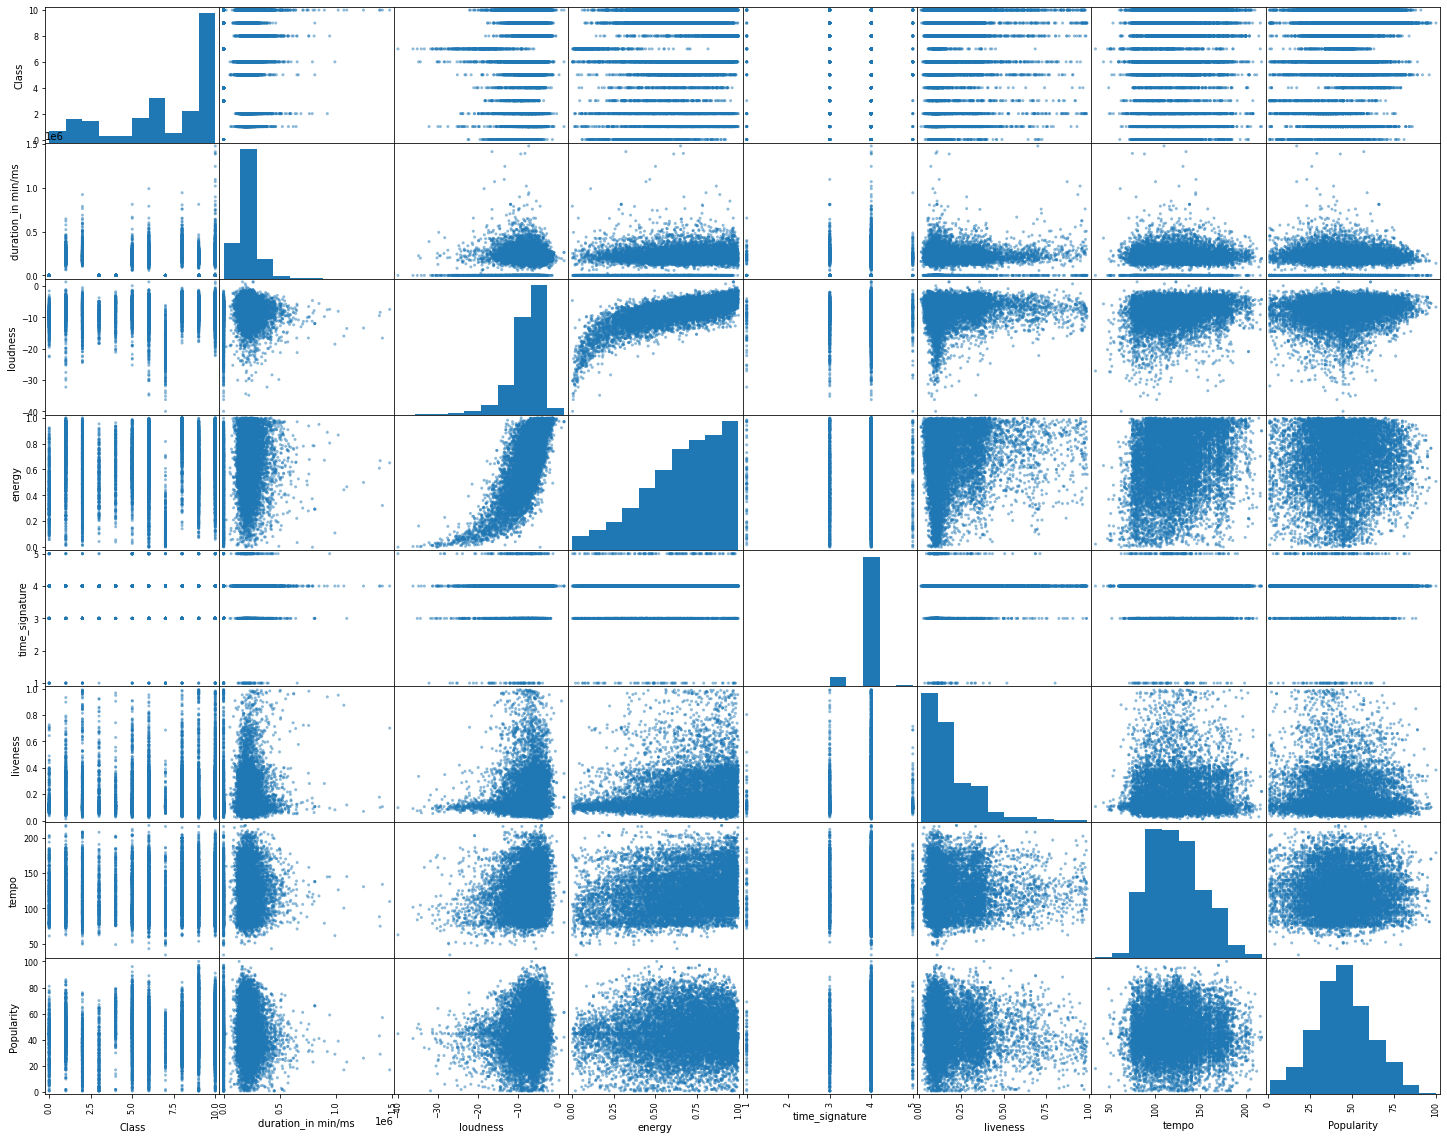

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["Class", "duration_in min/ms", "loudness","energy","time_signature","liveness","tempo","Popularity"]
scatter_matrix(train_set[attributes], figsize=(25, 20));

In [ ]:
train_set1['Popularity'] = train_set1['Popularity'].fillna(train_set1['Popularity'].mean())

In [ ]:
train_set1['key'] = train_set1['key'].fillna(train_set1['key'].mean())

In [ ]:
train_set1['instrumentalness'] = train_set1['instrumentalness'].fillna(train_set1['instrumentalness'].mean())

In [ ]:
train_set1.isnull().sum()

id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

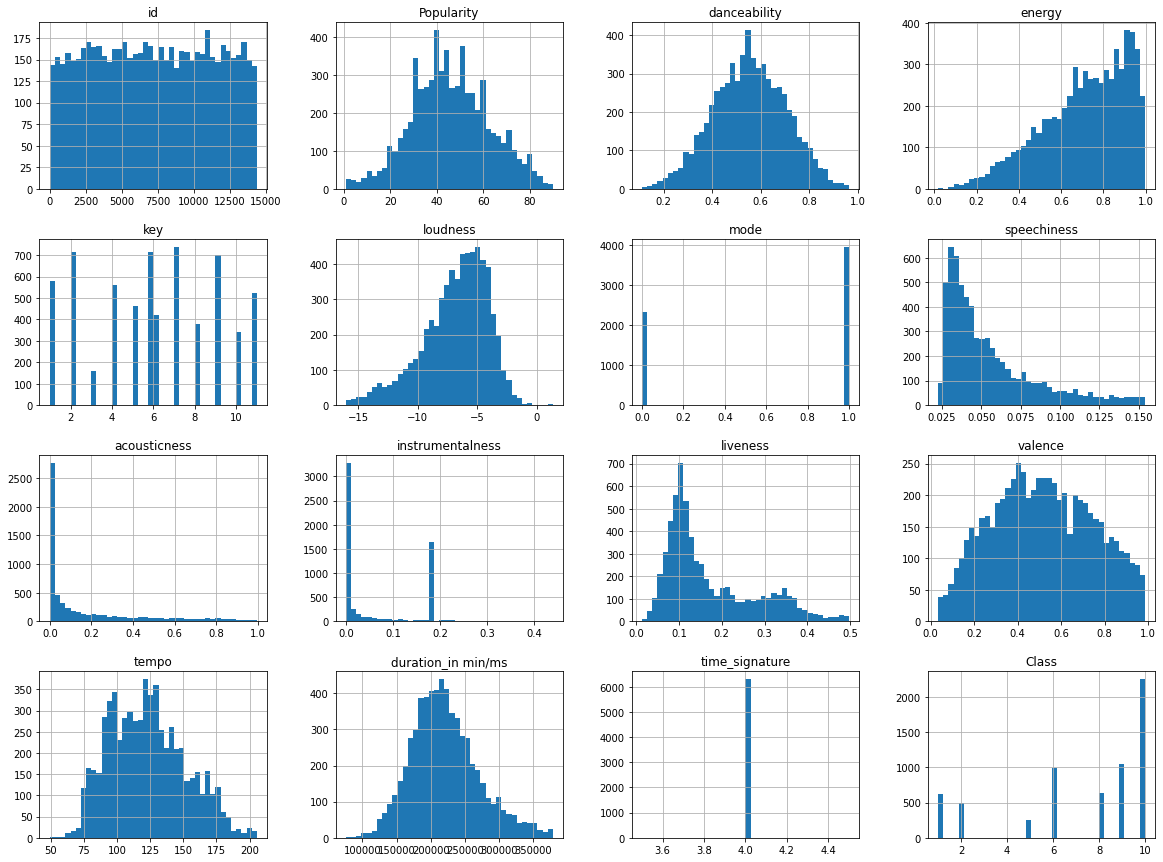

In [ ]:
train_set1.hist(bins = 40, figsize = (20,15))
plt.show()

In [ ]:
corr_matrix1 = train_set1.corr()
corr_matrix1["Class"].sort_values(ascending=False)

Class                 1.000000
Popularity            0.151547
loudness              0.151236
energy                0.139177
duration_in min/ms    0.059642
instrumentalness      0.050730
tempo                 0.030269
speechiness           0.005401
liveness             -0.001596
id                   -0.010464
key                  -0.025049
mode                 -0.035858
danceability         -0.091252
valence              -0.105759
acousticness         -0.133989
time_signature             NaN
Name: Class, dtype: float64

In [ ]:
cat_cols = ['key', 'mode', 'time_signature']
train_set1.drop(cat_cols, axis=1, inplace=False).describe().transpose().sort_index()

,count,mean,std,min,25%,50%,75%,max
Class,6295.0,7.286100,3.118050,1.000000,6.000000,9.00000,10.000000,10.000
Popularity,6295.0,46.166983,16.664684,1.000000,35.000000,45.00000,57.000000,90.000
acousticness,6295.0,0.181401,0.255769,0.000001,0.002450,0.04670,0.273000,0.995
danceability,6295.0,0.553759,0.149406,0.110000,0.449000,0.55300,0.660000,0.964
duration_in min/ms,6295.0,221173.065131,49770.659106,75760.000000,187160.000000,216493.00000,249992.500000,379000.000
energy,6295.0,0.710087,0.200440,0.017100,0.577000,0.74100,0.878000,0.998
id,6295.0,7209.227641,4123.170889,2.000000,3623.500000,7168.00000,10810.500000,14393.000
instrumentalness,6295.0,0.073473,0.094758,0.000001,0.000146,0.00823,0.177074,0.440
liveness,6295.0,0.172764,0.105667,0.013600,0.095850,0.12900,0.236000,0.497
loudness,6295.0,-6.840409,2.741223,-16.015000,-8.398500,-6.38300,-4.835000,1.342


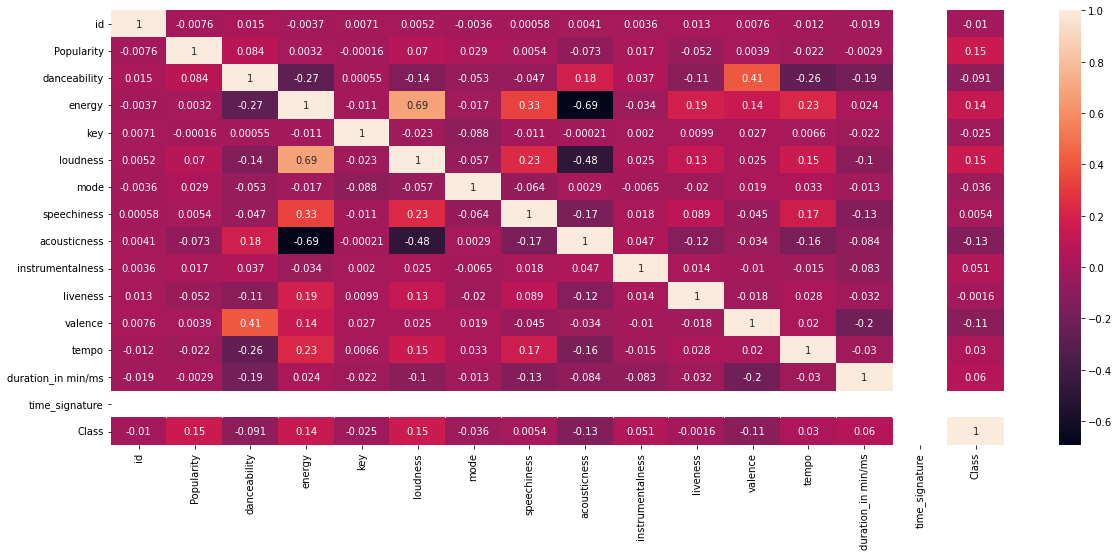

In [ ]:
# Plot the correlation with seaborn
plt.subplots(figsize = (20, 8))
sns.heatmap(corr_matrix1, annot = True)
plt.show()

In [ ]:
s = (train_set1.dtypes =="object")
object_cols = list(s[s].index)
object_cols

['Artist Name', 'Track Name']

In [ ]:
train_set1.isnull().sum()

id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [ ]:
# train_set1.drop(columns=['Track Name'], inplace = True)
# train_set1.drop(columns=['id'], inplace = True)
# train_set1.drop(columns=['key'], inplace = True)
# train_set1.drop(columns=['Artist Name'], inplace = True)

In [ ]:
train_set1['Track Name'] =LabelEncoder().fit_transform(train_set1['Track Name'])

In [ ]:
enc = OrdinalEncoder(categories=[train_set1["Artist Name"].value_counts().sort_values(ascending = True).index],dtype=int)
train_set1[['Artist Name']]=enc.fit_transform(train_set1[['Artist Name']])

In [ ]:
train_set1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6295 entries, 0 to 11515
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  6295 non-null   int64  
 1   Artist Name         6295 non-null   int64  
 2   Track Name          6295 non-null   int64  
 3   Popularity          6295 non-null   float64
 4   danceability        6295 non-null   float64
 5   energy              6295 non-null   float64
 6   key                 6295 non-null   float64
 7   loudness            6295 non-null   float64
 8   mode                6295 non-null   int64  
 9   speechiness         6295 non-null   float64
 10  acousticness        6295 non-null   float64
 11  instrumentalness    6295 non-null   float64
 12  liveness            6295 non-null   float64
 13  valence             6295 non-null   float64
 14  tempo               6295 non-null   float64
 15  duration_in min/ms  6295 non-null   float64
 16  time_

In [ ]:
X= train_set1.drop(["Class"],axis =1)
y= train_set1["Class"]

In [ ]:
smote = SMOTE()

In [ ]:
x_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
print('Origianl dataset shape:', Counter(y))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({10: 2250, 9: 1049, 6: 995, 8: 636, 1: 616, 2: 498, 5: 251})
Resampple dataset shape: Counter({10: 2250, 9: 2250, 1: 2250, 8: 2250, 2: 2250, 5: 2250, 6: 2250})


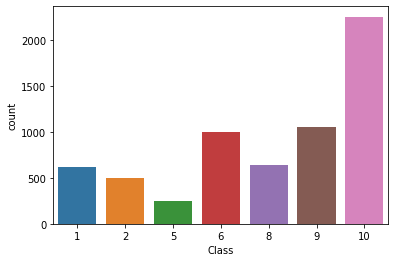

In [ ]:
sns.countplot(train_set1["Class"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote,test_size=0.25, random_state=7)

In [ ]:
X_train.head()

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
3838,5485,3534,3064,50.000000,0.334000,0.965000,11.000000,-3.932000,0,0.098800,0.000218,0.177074,0.317000,0.481000,90.521000,205333.000000,4
15546,7321,3372,780,42.048569,0.709118,0.629809,6.048569,-6.491517,1,0.036440,0.022162,0.174526,0.125773,0.403794,97.332539,201981.272871,4
14527,12580,3262,1914,46.125503,0.338383,0.917416,1.625101,-4.885870,0,0.060066,0.002291,0.036899,0.140839,0.279091,85.506897,229695.709665,4
9385,10114,1891,1140,20.906252,0.545037,0.802575,5.566151,-6.442169,0,0.070007,0.173356,0.088595,0.037231,0.779206,124.043786,257796.250089,4
4001,9256,2029,615,33.000000,0.356000,0.247000,4.000000,-9.279000,1,0.028200,0.433000,0.000001,0.104000,0.044000,150.124000,233507.000000,4


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled =  pd.DataFrame(X_train_scaled,columns=X_train.columns,index=X_train.index)

In [ ]:
X_test_scaled= scaler.transform(X_test)
X_test_scaled =  pd.DataFrame(X_test_scaled,columns=X_test.columns,index=X_test.index)

In [ ]:
X_train_scaled.head()

,id,Artist Name,Track Name,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
3838,-0.428097,1.053973,0.245107,0.319165,-1.647003,1.448647,1.234393,-0.953501,1.361395,-0.812032,1.206755,1.519707,-0.175927,-1.248474,-0.286843,0.0
15546,0.032894,0.901586,-1.312978,-0.199194,0.913268,-0.349406,0.211488,1.048766,-0.806082,-0.720479,1.176817,-0.504500,-0.538519,-0.980800,-0.352559,0.0
14527,1.353349,0.798114,-0.539393,0.066584,-1.617088,1.193393,0.853181,-0.953501,0.015109,-0.803384,-0.440360,-0.345023,-1.124184,-1.445513,0.190833,0.0
9385,0.734174,-0.491528,-1.067395,-1.577476,-0.206622,0.577355,0.231210,-0.953501,0.360605,-0.089674,0.167087,-1.441758,1.224586,0.068876,0.741796,0.0
4001,0.518743,-0.361717,-1.425536,-0.789076,-1.496848,-2.402900,-0.902522,1.048766,-1.092488,0.993603,-0.873918,-0.734979,-2.228278,1.093753,0.265561,0.0


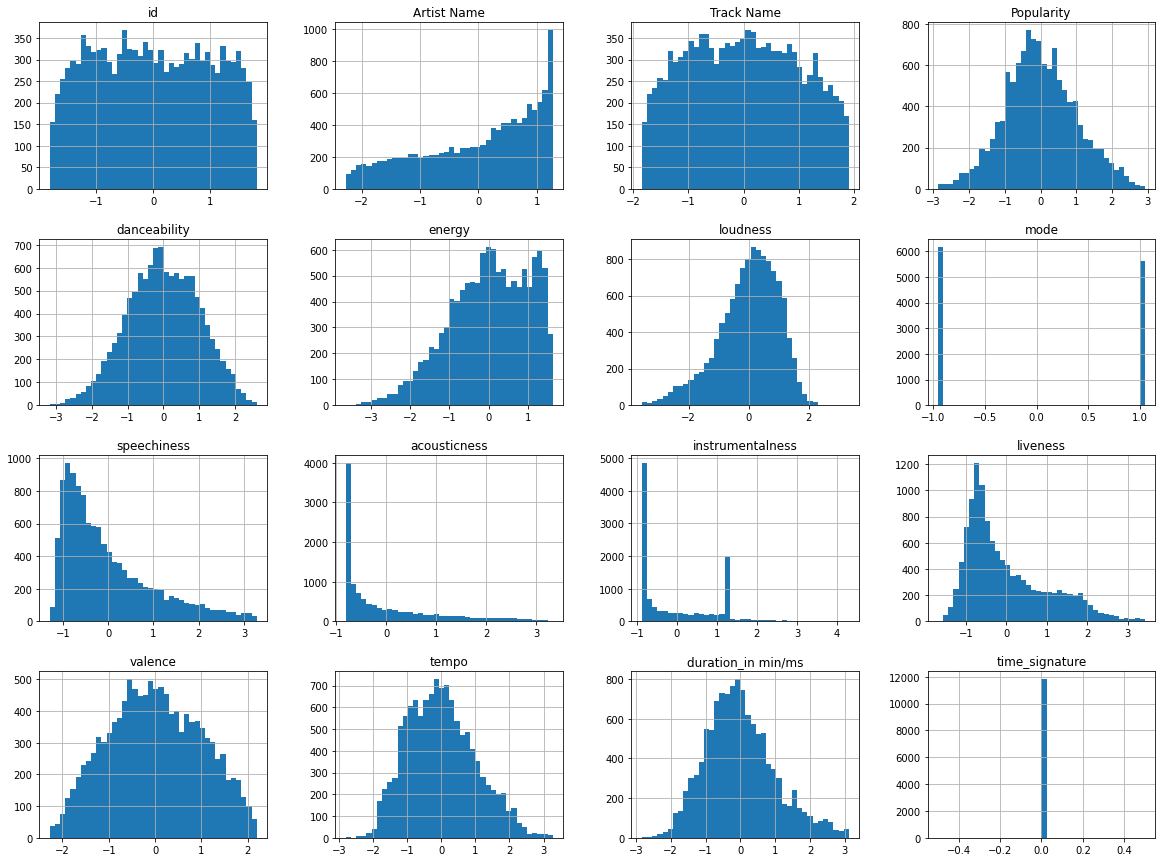

In [ ]:
X_train_scaled.hist(bins = 40, figsize = (20,15))
plt.show()

In [ ]:
#X_test_scaled= scaler.transform(X_test)
#X_test_scaled =  pd.DataFrame(X_test_scaled,columns=X_test.columns,index=X_test.index)
X_test_scaled.head()

,id,Artist Name,Track Name,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,0.877687,0.068618,-0.886056,0.988989,-0.221649,0.931866,1.114690,NaN,0.431770,-0.295500,0.969983,-0.956282,1.647972,-1.370079,0.517152,NaN
1,-0.542231,0.404431,1.207171,0.517027,1.191494,-0.345357,0.240409,NaN,-0.799920,-0.397964,1.208683,-0.219091,0.542956,-0.695775,-0.415331,NaN
2,-1.156263,0.886576,0.513718,0.661593,-1.481618,-0.802671,-0.186903,1.0,-0.027978,2.127803,1.208683,-0.868088,-0.156778,-1.465140,-0.138309,4.0
3,1.744674,0.062990,-1.364159,0.462697,-0.950930,0.380166,0.756217,NaN,0.119059,-0.746505,1.208683,-0.474529,-0.373689,0.973570,0.196470,NaN
4,1.388626,1.209256,-1.464385,1.854968,-0.571867,-0.137666,1.307778,NaN,-1.035723,-0.788965,-0.864877,-1.423134,-0.100192,1.738512,0.828745,NaN


In [ ]:
lab =LabelEncoder()
y_train=lab.fit_transform(y_train)
y_test=lab.fit_transform(y_test)

In [ ]:
X_train.drop(columns=['key'], axis=1, inplace=True)

In [ ]:
X_test.drop(columns=['key'], axis=1, inplace=True)

## Select and Train Model

### KNeighborsClassifier model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(X_train_scaled, y_train) 

predicted = knn.predict(X_test_scaled)
knn.score(X_train_scaled,y_train)

0.5590924483576024

In [ ]:
knn.score(X_test_scaled,y_test)

0.5337734890807516

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, predicted,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, predicted,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, predicted,average='weighted')))

Accuracy: 0.53
Precision: 0.52
Recall: 0.53
F1: 0.51


### RandomForest model 

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
rnd_clf.score(X_train,y_train)

1.0

In [ ]:
rnd_clf.score(X_test,y_test)

0.7160995429151854

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_rf)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_rf,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_rf,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_rf,average='weighted')))

Accuracy: 0.72
Precision: 0.70
Recall: 0.72
F1: 0.71


####Grid_search_for_RandomForest

In [ ]:
param_grid = {
    'n_estimators': [100,120,140],
    'max_depth': [6,7],
    'max_features': ['log2'],
}
 #'min_samples_leaf': [3],
 #   'min_samples_split': [5],
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 7], 'max_features': ['log2'],
                         'n_estimators': [100, 120, 140]},
             verbose=2)

In [ ]:
print('Grid best parameter (max. accuracy): ', grid_search.best_params_)
print('Grid best score (accuracy): ', grid_search.best_score_)

Grid best parameter (max. accuracy):  {'max_depth': 7, 'max_features': 'log2', 'n_estimators': 100}
Grid best score (accuracy):  0.5359792855061969


In [ ]:
print('Grid best parameter (max. accuracy): ', grid_search.best_params_)
print('Grid best score (accuracy): ', grid_search.best_score_)

Grid best parameter (max. accuracy):  {'max_depth': 7, 'max_features': 'log2', 'n_estimators': 100}
Grid best score (accuracy):  0.5359792855061969


In [ ]:
finalRandom1 = grid_search.best_estimator_

In [ ]:
finalRandom1.score(X_train,y_train)

0.588892651540806

In [ ]:
finalRandom1.score(X_test,y_test)

0.5472320975114271

In [ ]:
y_predRandom1 = finalRandom1.predict(X_test)

In [ ]:
#randomforest
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predRandom1)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predRandom1,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predRandom1,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_predRandom1,average='weighted')))

Accuracy: 0.55
Precision: 0.52
Recall: 0.55
F1: 0.51


In [ ]:
finalRandom2 = grid_search.best_estimator_

In [ ]:
finalRandom2.score(X_train,y_train)

0.7247714188960379

In [ ]:
finalRandom2.score(X_test,y_test)

0.595733875063484

In [ ]:
y_predRandom2 = finalRandom2.predict(X_test)

In [ ]:
#randomforest
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predRandom1)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predRandom1,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predRandom1,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_predRandom1,average='weighted')))

Accuracy: 0.55
Precision: 0.52
Recall: 0.55
F1: 0.51


### Voting Classifiers

In [ ]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [ ]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [ ]:
y_pred_vot = voting_clf.predict(X_test)

In [ ]:
voting_clf.score(X_train,y_train)

0.5274297324754487

In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.21533773489080751
RandomForestClassifier 0.7112747587607923
SVC 0.20594210259014728
VotingClassifier 0.4286439817166074


In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_vot)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_vot,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_vot,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_vot,average='weighted')))

Accuracy: 0.43
Precision: 0.45
Recall: 0.43
F1: 0.40


### Bagging and Pasting in Scikit-Learn

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred,average='weighted')))

Accuracy: 0.51
Precision: 0.48
Recall: 0.51
F1: 0.48


### Out-of-Bag Evaluation

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.688791059939045

In [ ]:
y_pred_out = bag_clf.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_out)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_out,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_out,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_out,average='weighted')))

Accuracy: 0.69
Precision: 0.68
Recall: 0.69
F1: 0.68


In [ ]:
cmBagging = confusion_matrix(y_test, y_pred_out)

In [ ]:
cmBagging

array([[365,  25,  12,  81,  33,   7,  49],
       [ 28, 538,   7,  16,   5,  11,  14],
       [  9,   8, 466,   2,   0,  19,   6],
       [108,  39,  28, 254,  22,  39,  59],
       [  6,   3,   1,  14, 515,   4,  45],
       [ 26,  23,  59,  33,   3, 369,  43],
       [ 63,  33,   9,  62, 104,  56, 217]])

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [ ]:
y_pred_ada = ada_clf.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_ada)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_ada,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_ada,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_ada,average='weighted')))

Accuracy: 0.50
Precision: 0.48
Recall: 0.50
F1: 0.48


### GradientBoosting Classifier

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features=5, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, max_features=5, random_state=0)

In [ ]:
y_boot = gb_clf2.predict(X_test)

In [ ]:
gb_clf2.score(X_train,y_train)

0.5985438537080935

In [ ]:
gb_clf2.score(X_test,y_test)

0.5985438537080935

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_boot)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_boot,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_boot,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_boot,average='weighted')))

Accuracy: 0.57
Precision: 0.55
Recall: 0.57
F1: 0.56


### XGBClassifier 

In [ ]:
model = XGBClassifier(max_depth=2)
model.fit(X_train, y_train)

XGBClassifier(max_depth=2, objective='multi:softprob')

In [ ]:
y_XGboot = model.predict(X_test)

In [ ]:
model.score(X_train,y_train)

0.5717067389095835

In [ ]:
model.score(X_test,y_test)

0.5464702894870492

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_XGboot)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_XGboot,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_XGboot,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_XGboot,average='weighted')))

Accuracy: 0.55
Precision: 0.52
Recall: 0.55
F1: 0.53


### SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(max_iter=1000, tol=0.01)
sgdc.fit(X_train,y_train)

SGDClassifier(tol=0.01)

In [ ]:
y_pred_sgd = sgdc.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_sgd)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_sgd,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_sgd,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_sgd,average='weighted')))

Accuracy: 0.17
Precision: 0.10
Recall: 0.17
F1: 0.08


### OneVsOneClassifier model

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

OvO_clf = OneVsOneClassifier(LogisticRegression())
OvO_clf.fit(X_train,y_train)
y_pred_ovo = OvO_clf.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_ovo)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_ovo,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_ovo,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_ovo,average='weighted')))

Accuracy: 0.28
Precision: 0.26
Recall: 0.28
F1: 0.26


### Grid Search with OVO

In [ ]:
tuned_parameters = [{'estimator__C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]}]


OvO_clf = OneVsOneClassifier(LogisticRegression())

grid = GridSearchCV(OvO_clf, tuned_parameters, cv=3, scoring='accuracy')

grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=OneVsOneClassifier(estimator=LogisticRegression()),
             param_grid=[{'estimator__C': [100, 10, 1, 0.1, 0.01, 0.001,
                                           0.0001]}],
             scoring='accuracy')

In [ ]:
print(grid.best_score_)

0.26583189208362507


In [ ]:
print(grid.best_params_)

{'estimator__C': 100}


In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, grid_predictions,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, grid_predictions,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, grid_predictions,average='weighted')))

Accuracy: 0.28
Precision: 0.26
Recall: 0.28
F1: 0.26


In [ ]:
from sklearn.svm import SVC

OvO_SVC_clf = OneVsOneClassifier(SVC())
OvO_SVC_clf.fit(X_train,y_train)
y_pred_s = OvO_SVC_clf.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_s)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_s,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_s,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_s,average='weighted')))

Accuracy: 0.21
Precision: 0.14
Recall: 0.21
F1: 0.14


### GaussianNB model

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_nb)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_nb,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_nb,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_nb,average='weighted')))

Accuracy: 0.36
Precision: 0.35
Recall: 0.36
F1: 0.33


### LogisticRegression model

In [ ]:
logisticRegr = LogisticRegression(multi_class = 'ovr')
logisticRegr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [ ]:
y_pred_log = logisticRegr.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_log)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_log,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_log,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_log,average='weighted')))

Accuracy: 0.27
Precision: 0.25
Recall: 0.27
F1: 0.25
